In [140]:
import json
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
from json import JSONDecodeError
from pprint import pprint as pp
import datetime as dt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
import plotly.graph_objs as go
import matplotlib.cbook as cbook
import xarray as xr
%matplotlib inline

In [141]:
url = 'https://api.open-meteo.com/v1/forecast?latitude=43.70&longitude=-79.42&hourly=snowfall'
r = requests.get(url)

In [142]:
print("The requested data: ")
dataobj = r.json()
time.sleep(1)

print(json.dumps(dataobj, indent= 4))
print()

The requested data: 
{
    "latitude": 43.70455,
    "longitude": -79.4046,
    "generationtime_ms": 0.36704540252685547,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 180.0,
    "hourly_units": {
        "time": "iso8601",
        "snowfall": "cm"
    },
    "hourly": {
        "time": [
            "2023-02-23T00:00",
            "2023-02-23T01:00",
            "2023-02-23T02:00",
            "2023-02-23T03:00",
            "2023-02-23T04:00",
            "2023-02-23T05:00",
            "2023-02-23T06:00",
            "2023-02-23T07:00",
            "2023-02-23T08:00",
            "2023-02-23T09:00",
            "2023-02-23T10:00",
            "2023-02-23T11:00",
            "2023-02-23T12:00",
            "2023-02-23T13:00",
            "2023-02-23T14:00",
            "2023-02-23T15:00",
            "2023-02-23T16:00",
            "2023-02-23T17:00",
            "2023-02-23T18:00",
            "2023-02-23T19:00",
           

In [143]:
print("The keys of the requested data are:")
print()
time.sleep(1)

pp(((list(dataobj.keys()))))


The keys of the requested data are:

['latitude',
 'longitude',
 'generationtime_ms',
 'utc_offset_seconds',
 'timezone',
 'timezone_abbreviation',
 'elevation',
 'hourly_units',
 'hourly']


In [144]:
#Nested Data from the API
time.sleep(1)

attr1 = dataobj['timezone']
print("The timezone is:", attr1)

The timezone is: GMT


In [145]:
#Nested Data from the API
print("The snow:" )
print()
time.sleep(1)

attr2 = dataobj['hourly']['snowfall']
print(attr2)

The snow:

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.07, 0.07, 0.0, 0.0, 0.0, 0.07, 0.07, 0.14, 0.14, 0.07, 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.07, 0.0, 0.07, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 1.89, 0.98, 2.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28, 0.28, 0.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [146]:
for snow in attr2:
    if snow != 0:
        print("The chances to have snowfall are :")
        print(snow)


The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.14
The chances to have snowfall are :
0.14
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.14
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.07
The chances to have snowfall are :
0.7
The chances to have snowfall are :
1.89
The chances to have snowfall are :
0.98
The chances to have snowfall are :
2.03
The chances to have snowfall are :
0.28
The chances to have snowfall are :
0.28
The chances to have snowfall are :
0.28


In [151]:
xaxis = dataobj['hourly']['time']
yaxis = dataobj['hourly']['snowfall']

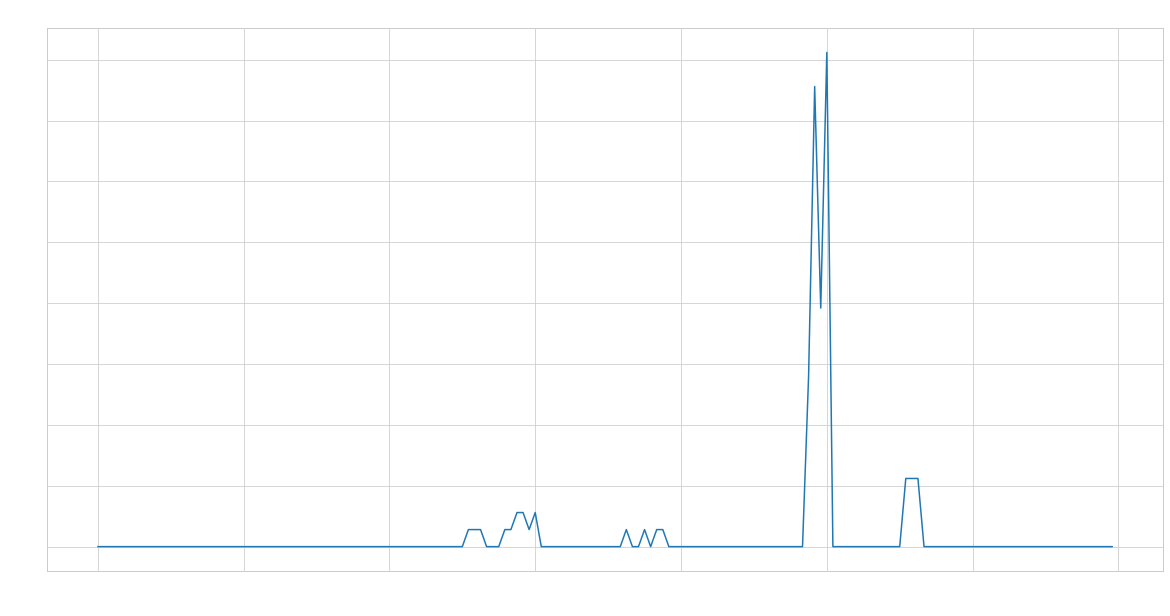

In [152]:
xaxis = [datetime.fromisoformat(datestring) for datestring in xaxis]

plt.figure(figsize=(20,10))

plt.title('Generated in 0.42, download in 467 ms, time in GMT+0', fontsize=20, color='white')
plt.plot(xaxis, yaxis)

plt.xlabel("<---------------------------------------------------------------- SNOWFALL ---------------------------------------------------------------->", size = 10, color = 'white')
plt.ylabel("<---------------------------------------------- CM ---------------------------------------------->",size = 10, color = 'white')

plt.xticks(rotation=10)

plt.tick_params(axis = 'x', colors = 'white')
plt.tick_params(axis = 'y', colors = 'white')

plt.show()